## import

In [29]:
import pandas as pd
import numpy as np
import json
import snownlp
from snownlp import SnowNLP
from sklearn import preprocessing
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from numpy import linalg as LA
from keras import regularizers
from textblob import TextBlob

## import data

In [428]:
data= pd.read_csv("ted_main.csv")
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Analyze Transcript sentiment, add to main dataset

In [543]:
def en_to_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
transcripts = pd.read_csv('transcripts.csv')
transcripts.head()
data.head()
transcript=[]
for i in transcripts.transcript:
    transcript.append(en_to_sentiment(i))
transcripts['sentiment']=transcript
try_transcripts = transcripts
new_transcripts = transcripts
transcripts.head()
# print(data)

0.146451560755806
0.15777463614384146
0.1365787118506784
0.0829276014990301
0.09648253773253775
0.12671188764938762
0.11236667062009535
0.0988275274224522
0.1996771327933916
0.1522819165356479
0.14487898789878992
0.10655459726888299
0.028754267084490963
0.2173661302465651
0.14802921916150616
0.23840328839869288
0.1951951058201058
0.11817332376925406
0.14627193478356276
0.13544415852465388
0.15635909561453046
0.12942440817440817
0.13852402402402403
0.20969136878994032
0.13771957671957677
0.06565725246975246
0.07755555300608306
0.12119015633913886
0.15150256518798955
0.20123201690550857
0.14405763548620704
0.11095562221196732
0.0953262127551227
0.0678898544266191
0.1578676859134606
0.13000682793601254
0.0898064776874937
0.1717341752535415
0.01773848086779121
0.1195228117036627
0.1741504014267593
0.09093615069246837
0.08596834211128926
0.1688594276094276
0.12434519714605671
0.09073091644520222
0.11459538028881096
0.1565884920634921
0.0944327731092437
0.12591439173071828
0.1165619877099468

0.13386966882817508
0.09750668116138964
0.18319680319680318
0.1452934478715728
0.07468860869488483
0.165294701868776
0.15601821030970822
0.16216192537621107
0.13522862132675223
0.1835967162869337
0.19568518518518516
0.1406009450205879
0.11334834741977598
0.17519348070072704
0.10132468507468503
0.20249477036373592
0.12385808451423082
0.0296531100478469
0.08478338790838791
0.18331394300144302
0.11088372956020015
0.10848204955963577
0.14569031168831165
0.054718349135527054
0.08541921522921524
0.11063368563368559
0.5872296494355318
0.14332944832944833
0.11643941584731057
0.16256423611111112
0.12053763440860216
0.22452380952380951
0.2618877551020408
0.198075924075924
0.21601470633385542
0.057480019980019975
0.15639285714285714
0.12082721993453703
0.13471250030572066
0.17414141414141412
0.14162643678160924
0.04157804459691253
0.220140873015873
0.2209482924482924
0.20591076881774562
0.18772241261824596
0.1892197712418301
0.10596642096642094
0.14172017797017808
0.15409611992945327
0.1079993964

0.08462964071259002
0.11844245286394049
0.1071091646744632
0.10892341333130809
0.18126704605181423
0.1352128846605591
0.14052070603506014
0.19355654761904767
0.13188030763562683
0.05363476800976812
0.10134084749938406
0.2516813139882993
0.1418415918845104
0.21692303309064673
0.07625919913419914
0.1336215053338341
0.09783670033670032
0.1547165148284551
0.10849613349613349
0.03430126728110599
0.11382316017316019
0.12208130411255409
0.15555839424691884
0.17059222198566465
0.13657609324721623
0.231874450581347
0.1421778660438454
0.20151979565772668
0.11743325655825651
0.059732142857142866
0.1582980258512173
0.0728371241690913
0.1575879380393269
0.11351175851175851
0.1475766885444305
0.009876890263269345
0.02645528347818424
0.09582562117897822
0.10317425026664154
0.12373885222245878
0.1738515229324053
0.14913455252230762
0.25500703095090854
0.13554563492063493
0.15369540375825294
0.2204508318478907
0.03736227243076558
0.12424596081197209
0.062880291005291
0.05296790260544908
0.2645050125313

0.11859788359788356
0.08773511418721001
0.1337897886427298
0.24951284688087472
0.0023079239600978783
0.21404339894905935
0.15702996204708536
0.03188576204986818
0.07527501647872022
0.1388078690633037
0.1285443135675694
0.13608460700297437
0.11603718155287662
0.05186741284324926
0.1122051622212913
0.08300636232454414
0.18778584160937103
0.03449278990095316
0.09766202291370076
0.14205494797600055
0.24844653210037834
0.2090034965034965
0.18201101751101742
0.11907857142857141
0.08578405660460878
0.11116880759037619
0.11904932786511731
0.08057181523776352
0.010428538009183167
0.12562246453755885
0.1953054353054353
0.1644773105201677
0.14147745701151282
0.14288002681942066
0.2553409090909091
0.206640037593985
0.1934044672072841
0.15530090087381748
0.08717877757163472
0.170014371828888
0.06646005509641875
0.3064583333333334
0.10987256739209866
0.03474465148378194
0.17098484848484852
0.1885863739435168
0.1428213738146775
0.15570332396648193
0.18698046937630264
0.04725085392806912
0.14931349044

0.15876797444979265
0.049462370516587396
0.20150364073061452
0.15481816098457427
0.11113523976023978
0.10450208774676854
0.13687185037185032
0.11992492209883512
0.14724376813662532
0.079557356086374
0.24101750034231784
0.11475227859884515
0.12389261972595308
0.22895833333333337
0.12248912022721545
-0.010945885509838996
0.11523883606472893
0.09294070270814456
0.11779271654271653
0.20295968156137648
0.04099156746031747
0.14119259064952658
0.16338556161100798
0.15722777860708903
0.11020504585020717
0.14610427188552186
0.16123768549694473
0.11000208626714651
0.1347077042198994
0.10081354887457249
0.019862490450725755
0.0308771387342816
0.13743956043956043
0.07683044261475633
0.010171897546897544
0.4029658833230262
0.13795577090424424
0.08559804859223465
0.1266190476190476
0.1041561679061679
0.10628585858585853
0.1784794973544974
0.057399503375780744
0.18767482517482514
0.1499932393730104
0.10238480217957831
0.10974068774916228
0.21735177520891802
0.10473479129271819
0.16715143862871137
0.1

0.14847905071119358
0.10239267676767674
0.13892076970648393
0.09177505878894768
0.13398226773226776
0.16015732889699835
0.14879130409433444
0.19868060792254333
0.08598196187870101
0.10229380268853953
0.1085399449035813
0.10685763888888887
0.09729844926762737
0.08108766233766233
0.012217597743165932
0.05379128209316888
0.06894032158317871
0.10775642070446287
0.09853866974984986
0.15825041459369812
0.12898624828265548
0.05076200314836681
0.1303666125541126
0.11139870037959212
0.1359039955650125
0.1880018877621617
0.16106357473544977
0.23751396928430432
0.1322888888888889
0.11340797083740632
0.09573384353741493
0.13067762232998284
0.13791961325358276
0.11404349618635329
0.13554496117379555
0.1351000244442868
0.11509062752965188
0.10778316289185856
0.10948977647090853
0.11713104256854252
0.165482369665538
0.1990121999212908
0.13195736654218806
0.1014813338058952
0.012026515151515153
0.09756794131794132
0.08083739177489174
0.12293088694251487
0.09343928312065575
0.2092080503056112
0.1756378

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,sentiment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,0.146452
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",0.157775
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",0.136579
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,0.082928
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",0.096483


In [544]:
temp=pd.merge(pd.DataFrame(data), transcripts, on='url')
temp.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,sentiment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,0.146452
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",0.157775
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",0.136579
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,0.082928
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",0.096483


In [591]:
EDA_data=temp[['title','description','event','duration','languages','tags','ratings','views','sentiment']]
EDA_data.head()

,title,description,event,duration,languages,tags,ratings,views,sentiment
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,1164,60,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,0.146452
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,977,43,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,0.157775
2,Simplicity sells,New York Times columnist David Pogue takes aim...,TED2006,1286,26,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,0.136579
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,1116,35,"['MacArthur grant', 'activism', 'business', 'c...","[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,0.082928
4,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,1190,48,"['Africa', 'Asia', 'Google', 'demo', 'economic...","[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,0.096483


## get important event

In [546]:
impute_grps = EDA_data.pivot_table(values=["views"], index=["event"], aggfunc=np.mean)
print(impute_grps)
top_ten_event=impute_grps.views.nlargest(10).index
EDA_data.loc[~EDA_data.event.isin(top_ten_event),'event']='others'
EDA_data.event

                                             views
event                                             
Arbejdsglaede Live                    9.715940e+05
Business Innovation Factory           3.787800e+05
Chautauqua Institution                2.608687e+05
DLD 2007                              7.638150e+05
EG 2007                               1.037267e+06
EG 2008                               2.048259e+06
Elizabeth G. Anderson School          1.026589e+06
Full Spectrum Auditions               1.172358e+06
Global Witness HQ                     1.015683e+06
INK Conference                        1.642960e+06
LIFT 2007                             1.486853e+06
Mission Blue II                       1.329472e+06
Mission Blue Voyage                   5.352833e+05
Serious Play 2008                     9.259401e+05
Skoll World Forum 2007                4.182340e+05
TED Dialogues                         1.202384e+06
TED Fellows 2015                      1.296514e+06
TED Fellows Retreat 2013       

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0       others
1       others
2       others
3       others
4       others
5       others
6       others
7       others
8       others
9       others
10      others
11      others
12      others
13      others
14      others
15      others
16      others
17      others
18      others
19      others
20      others
21      others
22      others
23      others
24      others
25      others
26      others
27      others
28      others
29      others
         ...  
2437    others
2438    others
2439    others
2440    others
2441    others
2442    others
2443    others
2444    others
2445    others
2446    others
2447    others
2448    others
2449    others
2450    others
2451    others
2452    others
2453    others
2454    others
2455    others
2456    others
2457    others
2458    others
2459    others
2460    others
2461    others
2462    others
2463    others
2464    others
2465    others
2466    others
Name: event, Length: 2467, dtype: object

In [548]:
one_hot_event=pd.get_dummies(EDA_data.event)
one_hot_event.head()
#pd.concat([EDA_data, one_hot_event], axis=1)

,TEDxAmericanRiviera,TEDxBloomington,TEDxCHUV,TEDxCreativeCoast,TEDxGoldenGatePark 2012,TEDxHouston,TEDxLinnaeusUniversity,TEDxNorrkoping,TEDxPuget Sound,TEDxUW,others
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1


## get title/describetion sentiment 

In [667]:
def to_sentiment(description):
    s=SnowNLP(description)
    return(s.sentiments)
description_sentiment=[]
nonlinear_description_sentiment=[]
title_sentiment=[]
nonlinear_trans_sentiment = []
nonlinear_title_sentiment=[]
for description in EDA_data.description:
    description_sentiment.append(to_sentiment(description))
    nonlinear_description_sentiment.append(1/to_sentiment(description))
for title in EDA_data.title:
    title_sentiment.append(to_sentiment(title))
    nonlinear_title_sentiment.append(1/to_sentiment(title))
    
description_sentiment=pd.Series(description_sentiment)
nonlinear_description_sentiment=pd.Series(nonlinear_description_sentiment)
title_sentiment=pd.Series(title_sentiment)
nonlinear_title_sentiment=pd.Series(nonlinear_title_sentiment)
# nonlinear_trans_sentiment=pd.Series(nonlinear_trans_sentiment)
print(nonlinear_title_sentiment.max())


148.075405886


## clean up tags

In [607]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def map_new(x,true_tags):
    max_match=0
    max_index = 0
    for i in true_tags:
        if similar(i,x)>max_match:
            max_match = similar(i,x)
            max_index = i
    print(max_index)
    return(max_index)

def get_flat_tags(df):
    tags=[]
    for tag in df.new_tags:
        old=tag[1:len(df.new_tags[1])-1]
        nospace=old.replace(" ", "")
        clean=nospace.replace("'", "")
        clean = clean.replace("]","")
        tags.append(clean.split(","))
    df['clean_tags']=tags
    flat_tags = sum(tags,[])
    return(flat_tags)

def get_unique_tags(flat_tags):
    unique_tags = pd.Series(flat_tags).unique()
    unique_tags = sorted(unique_tags)
    return(unique_tags)
    
def get_true_tags(unique_tags):
    tag_num = len(unique_tags)
    true_tags = []
    for i in range(0,tag_num-1):
        if similar(unique_tags[i],unique_tags[i+1])<0.5:
            true_tags.append(unique_tags[i+1])
    return(true_tags)
            
def append_new_tags(df,true_tags):
    new_tags = []
    for tagings in df.clean_tags:
        new_tag = []
        for tag in tagings:
            new_tag.append(map_new(tag,true_tags))
        new_tags.append(new_tag)
    return(new_tags)

In [595]:
EDA_data.head()
flat_tags = get_flat_tags(EDA_data)
unique_tags = get_unique_tags(flat_tags)
unique_tags

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['',
 '"Alzheimers"',
 '3dprinting',
 'AI',
 'AIDS',
 'Addiction',
 'Africa',
 'Anthropocene',
 'Asia',
 'Autismspectrumdisorder',
 'Bioethics',
 'Blindness',
 'Brand',
 'Brazil',
 'Buddhism',
 'CRISPR',
 'Christianity',
 'CriminalJustice',
 'DNA',
 'Debate',
 'Egypt',
 'Europe',
 'ForeignPolicy',
 'Genderequality',
 'Genderspectrum',
 'God',
 'Google',
 'Guns',
 'HIV',
 'Humanbody',
 'Internet',
 'Iran',
 'Islam',
 'LGBT',
 'MacArthurgrant',
 'Mars',
 'MiddleEast',
 'Moon',
 'NASA',
 'Naturalresources',
 'NewYork',
 'Nobelprize',
 'PTSD',
 'Planets',
 'Senses',
 'Slavery',
 'SouthAmerica',
 'Stringtheory',
 'Surgery',
 'Surveillance',
 'Syria',
 'TED-Ed',
 'TEDBooks',
 'TEDBrainTrust',
 'TEDFellows',
 'TEDMED',
 'TEDNYC',
 'TEDPrize',
 'TEDResidency',
 'TEDYouth',
 'TEDenEspañol',
 'TEDx',
 'Transgender',
 'UnitedStates',
 'Vaccines',
 'activism',
 'adventure',
 'advertising',
 'aging',
 'agriculture',
 'aircraft',
 'algorithm',
 'alternativeenergy',
 'ancientworld',
 'animals',
 'ani

In [599]:
true_tags = get_true_tags(unique_tags)
true_tags
len(true_tags)

310

In [600]:
new_tags = append_new_tags(EDA_data,true_tags)

children
creativity
culture
dance
educat
3dprinting
hearing
alternativeenergy
cars
climatechange
culture
nonviolence
globalis
rocketscience
disability
geology
perso
Internet
industrialdesign
medi
mic
finance
simplicity
software
geology
MacArthurgrant
atheism
Blindness
capitalism
nonviolence
green
Genderequality
poli
collaboration
Africa
Asia
Google
demo
behavioraleconomics
globalis
globalis
hearthealth
math
prosthetics
visualiz
Blindness
culture
Internet
goal-setting
motiv
pote
psychology
Christianity
God
atheism
comedy
culture
hu
finance
prediction
storyte
architecture
collaboration
culture
depression
library
God
TEDBrainTrust
atheism
Iran
cognitivescience
consciousness
corruption
philanthrop
prediction
Christianity
God
culture
Vaccines
leadership
motiv
philanthrop
prediction
atheism
architecture
collaboration
culture
depression
naturaldisaster
globalis
deextinction
open-source
p
TEDPrize
art
culture
Internet
film
globalis
movies
space
climatechange
storyte
TEDPrize
collaboration
dino

culture
globalis
military
space
geology
atheism
art
depression
map
aircraft
geology
virtualreality
Africa
Asia
Google
behavioraleconomics
globalis
globalis
hearthealth
Genderequality
poverty
prosthetics
vi
Moon
NASA
Planets
adventure
nuclearenergy
exploration
mining
space
geology
TEDBrainTrust
culture
fish
meme
philanthrop
prediction
Bioethics
cancer
depression
hearthealth
theater
medici
geology
depression
Internet
globalis
software
geology
AI
Africa
behavioraleconomics
globalis
hearthealth
rocketscience
prosthetics
demo
depression
Internet
gaming
geology
Internet
poverty
spokenword
sanitation
depression
Internet
film
hearthealth
medici
rocketscience
geology
visualiz
culture
theater
hearing
medici
Africa
Blindness
corruption
behavioraleconomics
Internet
globalis
globalis
philanthrop
Africa
Blindness
behavioraleconomics
Internet
globalis
globalis
theater
insects
philanthrop
Africa
alternativeenergy
depression
nuclearenergy
globalis
intelli
library
geology
Africa
Blindness
Internet
globa

biomechanics
demo
depression
Internet
gaming
geology
virtualreality
culture
film
library
movies
perso
storyte
Blindness
cognitivescience
collaboration
culture
climatechange
soc
geology
Internet
hu
livemusic
lo
mic
finance
piano
men
Planets
anthropology
asteroid
biomechanics
exploration
extraterrestrial
phys
rocketscience
geology
univ
Iran
cognitivescience
culture
architecture
lo
poverty
psychology
relati
rocketscience
geology
Christianity
God
data
fish
prediction
geology
comedy
culture
Internet
humanit
hu
prediction
writing
Iran
Internet
ill
magic
Iran
educat
psychology
Vaccines
interfa
morality
psychology
rocketscience
geology
Africa
art
Blindness
depression
Africa
culture
Internet
humanit
hu
architecture
poverty
writing
Africa
ancientworld
anthropology
pe
corruption
humanit
humanit
anthropology
rocketscience
art
culture
Internet
globalis
Vaccines
software
storyte
web
architecture
art
Blindness
depression
hu
communication
comedy
culture
geology
web
Iran
comedy
perso
depression
mining


Internet
work
creativity
depression
Vaccines
demo
depression
industrialdesign
geology
atheism
depression
compassion
culture
prosthetics
extremesports
geology
Iran
children
educat
Internet
gaming
Vaccines
hearthealth
law
psychology
rocketscience
Blindness
communication
depression
deextinction
geology
web
animals
biology
children
comedy
corruption
food
humanit
hu
primates
exp
Iran
culture
behavioraleconomics
evil
motiv
psychology
rocketscience
self
soc
animals
art
birds
creativity
Internet
exploration
film
geology
art
Internet
hu
medi
architecture
capitalism
nonviolence
green
ants
rocketscience
geology
alternativeenergy
nuclearenergy
mining
nonviolence
culture
nuclearenergy
atheism
Blindness
culture
globalis
poverty
men
work
culture
geology
culture
educat
leadership
life
poverty
extremesports
work
AI
Africa
bacteria
biodiversity
biology
dinosaurs
exploration
globalis
hearthealth
biology
children
culture
Internet
architecture
poverty
soc
storyte
writing
Blindness
creativity
culture
depres

Genderequality
prediction
geology
ancientworld
cosmos
fish
histo
philanthrop
phys
prediction
rocketscience
geology
architecture
art
biology
depression
globalis
industrialdesign
life
rocketscience
disability
col
depression
Vaccines
life
perso
poverty
climatechange
soc
storyte
architecture
art
beauty
math
phys
rivers
anthropology
humanit
lo
psychology
origami
soc
biology
geology
Blindness
capitalism
depression
globalis
climatechange
geology
chemistry
climatechange
nonviolence
globalis
rocketscience
weather
TEDPrize
depression
nuclearenergy
globalis
typography
geology
culture
Internet
globalis
poverty
poli
demo
depression
open-source
geology
military
depression
dinosaurs
green
sanitation
adventure
industrialdesign
rocketscience
geology
nonviolence
globalis
leadership
poli
consciousness
Blindness
culture
globalis
india
asteroid
histo
sanitation
rocketscience
geology
Asia
behavioraleconomics
hearthealth
india
prosthetics
geology
visualiz
bigproblems
capitalism
nuclearenergy
nonviolence
cult

rocketscience
rocketscience
geology
children
depression
Internet
Internet
gaming
toy
collaboration
communication
culture
geology
wikipedia
TEDx
capitalism
depression
infrastructure
transportation
fish
hearthealth
missionblue
vocals
rocketscience
art
asteroid
rocketscience
space
geology
TEDFellows
architecture
depression
nonviolence
transportation
math
TEDx
food
globalis
hearthealth
obesity
climatechange
crime
geology
nonviolence
green
adventure
ants
perso
climatechange
bees
culture
data
demo
globalis
poverty
prediction
sanitation
TEDx
naturaldisaster
nuclearenergy
nonviolence
vocals
oil
collaboration
Blindness
collaboration
depression
geology
communication
globalis
langua
new
geology
web
culture
movies
poli
storyte
men
Surveillance
communication
globalis
iraq
military
new
geology
Islam
art
culture
space
Planets
anthropology
asteroid
biology
extraterrestrial
life
geology
telecom
rivers
Iran
perso
depression
Internet
industrialdesign
mind
geology
biology
depression
culture
medici
geology

pote
geology
TEDPrize
atheism
art
communication
typography
Egypt
demo
globalis
poli
pote
climatechange
gaming
educat
money
youth
Stringtheory
theater
deextinction
medici
prosthetics
culture
feminism
histo
biodiversity
men
writing
culture
educat
globalis
onlinevideo
hearing
Iran
children
langua
time
TEDx
Blindness
nonviolence
globalis
sanitation
adventure
rivers
disability
weather
Iran
culture
motiv
soc
darkmatter
rocketscience
rivers
communication
compassion
culture
TEDx
architecture
depression
Internet
finance
poverty
storyte
culture
data
behavioraleconomics
men
TEDFellows
animals
culture
law
rocketscience
Bioethics
TEDx
biology
biomechanics
deextinction
culture
Bioethics
philanthrop
rocketscience
depression
disability
exoskeleton
rocketscience
geology
TEDx
creativity
Internet
livemusic
mic
finance
TEDx
culture
globalis
langua
Iran
perso
poverty
nuclearenergy
rocketscience
geology
art
animals
depression
Internet
finance
theater
Blindness
driverlesscars
robot
rocketscience
geology
tran

biology
nanoscale
crime
TEDFellows
art
creativity
hu
geology
archaeology
histo
deextinction
geology
DNA
biomechanics
Iran
cognitivescience
dinosaurs
Bioethics
medici
medici
hearthealth
mo
TEDx
comedy
communication
culture
Internet
hu
Humanbody
biomechanics
depression
medici
medici
biology
pregnancy
rocketscience
streetart
0
adventure
depression
fish
geology
TEDx
cloud
educat
Internet
geology
youth
DNA
gaming
biomechanics
Bioethics
sanitation
medici
medici
biology
rocketscience
syntheticbiol
comedy
Internet
hu
philanthrop
rocketscience
streetart
time
NASA
TEDx
asteroid
asteroid
dinosaurs
rocketscience
space
geology
creativity
depression
mining
robot
geology
creativity
depression
Internet
storyte
geology
TEDx
capitalism
collaboration
depression
food
green
TEDx
Internet
Vaccines
Blindness
perso
prosthetics
crime
culture
globalis
philanthrop
perso
Iran
children
culture
educat
corruption
food
hearthealth
rocketscience
pregnancy
rocketscience
writing
TEDx
biology
dance
Internet
phys
sanitati

TEDFellows
art
biology
military
biomechanics
Iran
cognitivescience
mining
medici
curiosity
TEDPrize
art
communication
typography
space
TEDx
depression
naturaldisaster
globalis
naturaldisaster
DNA
Vaccines
bacteria
biodiversity
biology
dinosaurs
nonviolence
exploration
Bioethics
medici
0
TEDx
data
globalis
exploration
sanitation
prediction
Internet
magic
perso
storyte
AI
TEDx
globalis
hearthealth
law
comedy
Internet
hu
livemusic
mic
finance
poverty
TEDx
alternativeenergy
climatechange
data
globalis
math
nuclearenergy
disability
nuclearenergy
AI
Internet
TEDx
art
biomechanics
collaboration
communication
perso
green
industrialdesign
children
Internet
TEDx
ancientworld
archaeology
art
books
histo
library
museums
open-source
Egypt
TEDx
data
behavioraleconomics
pote
men
TEDx
communication
culture
depression
life
morality
philanthrop
culture
dance
Internet
geology
NASA
Planets
TEDx
asteroid
cosmos
data
exploration
extraterrestrial
culture
humanit
life
math
TEDx
securi
self
geology
Autismspect

psychology
climatechange
biology
youth
TEDx
communication
geology
art
creativity
Internet
typography
globalis
sanitation
deextinction
hearthealth
men
communication
culture
TEDYouth
art
depression
mining
sanitation
deextinction
law
toy
youth
communication
cancer
theater
TEDx
Iran
educat
gaming
TEDx
culture
depression
disability
mining
sanitation
deextinction
phys
poverty
industrialdesign
children
Internet
livemusic
finance
wunderkind
youth
TEDx
biodiversity
biology
compassion
culture
typography
TEDFellows
art
capitalism
communication
data
space
TEDx
Blindness
globalis
globalis
cars
transportation
Humanbody
TEDx
bodylanguage
hearthealth
theater
biodiversity
storyte
Africa
Egypt
adventure
animals
bacteria
biodiversity
biology
birds
collaboration
geology
nonviolence
0
culture
depression
hu
industrialdesign
geology
Egypt
TEDx
culture
fish
globalis
poli
prediction
atheism
art
Africa
Blindness
Internet
globalis
sanitation
deextinction
weather
Blindness
perso
TEDFellows
biology
biomechanics
ca

Asia
Blindness
children
demo
globalis
poli
TEDx
data
globalis
hearthealth
geology
TEDFellows
perso
depression
industrialdesign
geology
virtualreality
children
Internet
livemusic
mic
finance
wunderkind
Blindness
corruption
nuclearenergy
globalis
architecture
depression
bacteria
Internet
animals
geology
Internet
biology
cancer
dinosaurs
hearthealth
medici
medici
biology
nanoscale
rocketscience
0
culture
food
exp
animals
adventure
sound
beauty
adventure
typography
weather
culture
Vaccines
travel
worldcultures
writing
bacteria
biology
geology
nonviolence
green
bigproblems
biology
vocals
relati
collaboration
sanitation
TEDx
creativity
livemusic
mic
Senses
TEDx
behavioraleconomics
biology
Iran
cognitivescience
consciousness
humanit
biodiversity
intelli
depression
Internet
bacteria
geology
children
theater
3dprinting
3dprinting
Blindness
hearing
money
virus
culture
money
depression
fish
industrialdesign
conducting
transportation
TEDMED
hearthealth
theater
medici
space
creativity
Internet
fear

data
origami
biology
geology
corruption
demo
poverty
poli
architecture
capitalism
educat
sanitation
magic
sanitation
prediction
rocketscience
climatechange
storyte
hearing
bacteria
film
insects
nanoscale
adventure
typography
Senses
TEDFellows
globalis
prosthetics
geology
Guns
nonviolence
interfa
philanthrop
psychology
self
success
culture
failure
3dprinting
LGBT
TEDx
Transgender
Transgender
medici
youth
Planets
asteroid
rocketscience
space
geology
telecom
depression
industrialdesign
typography
art
failure
motiv
alternativeenergy
nuclearenergy
culture
industrialdesign
nuclearenergy
phys
rocketscience
disability
visualiz
TEDx
military
depression
vocals
extremesports
Senses
TEDFellows
perso
depression
industrialdesign
programming
creativity
failure
success
writing
Autismspectrumdisorder
DNA
Vaccines
biology
children
cognitivescience
disability
dinosaurs
failure
Internet
DNA
Bioethics
sanitation
biology
rocketscience
extremesports
Blindness
TEDFellows
hearthealth
deextinction
hearthealth
s

Africa
TEDx
culture
globalis
men
TEDFellows
creativity
film
writing
atheism
pote
climatechange
origami
soc
biology
geology
TEDx
dinosaurs
ebola
hearthealth
hearthealth
virus
TEDYouth
TEDx
Iran
morality
psychology
Blindness
collaboration
creativity
depression
leadership
TEDYouth
art
books
creativity
TEDYouth
animals
biology
military
dinosaurs
hearthealth
insects
medici
medici
bigproblems
medici
Blindness
creativity
leadership
philanthrop
work
TEDYouth
gaming
depression
sanitation
deextinction
industrialdesign
geology
TEDBooks
TEDx
lo
math
relati
prosthetics
TEDx
hearthealth
hearthealth
psychology
self
Iran
children
hearthealth
theater
Islam
MiddleEast
TEDFellows
educat
feminism
typography
men
NASA
TEDFellows
architecture
collaboration
crowdsourcing
depression
mining
food
culture
sanitation
p
TEDx
Genderequality
rac
climatechange
soc
TEDBooks
biology
hearthealth
MiddleEast
atheism
feminism
nonviolence
men
TEDenEspañol
hearthealth
theater
Blindness
medici
virus
NewYork
TEDx
capitalism
dat

gaming
fish
green
0
TEDx
dinosaurs
hearthealth
theater
hearthealth
medici
medici
men
Europe
MiddleEast
Syria
data
globalis
biodiversity
journ
art
TEDFellows
art
creativity
culture
langua
mic
adventure
sound
CriminalJustice
TEDFellows
communication
crime
journ
perso
privacy
Bioethics
CRISPR
DNA
biomechanics
mining
culture
Bioethics
hearthealth
sanitation
medici
medici
TEDx
depression
culture
Vaccines
humanit
deextinction
geology
SouthAmerica
adventure
beauty
biodiversity
geology
nonviolence
exploration
geology
glacier
typography
bigproblems
communication
climatechange
TEDFellows
collaboration
depression
educat
nonviolence
globalis
green
sanitation
deextinction
vocals
0
TEDFellows
art
communication
compassion
langua
mic
sound
Europe
Internet
Surveillance
art
communication
demo
poverty
intelli
poli
securi
ter
Iran
cognitivescience
hearthealth
medici
demo
hearthealth
rocketscience
atheism
bigproblems
communication
data
pain
poli
soc
geology
youth
MiddleEast
Syria
TEDx
globalis
poverty
huma

culture
inn
Internet
Iran
children
comedy
decision-making
Internet
goal-setting
hu
mind
onlinevideo
produ
TEDFellows
atheism
bigproblems
crime
depression
sanitation
industrialdesign
industrialdesign
sexualviolence
0
Debate
bigproblems
Blindness
capitalism
collaboration
communication
demo
behavioraleconomics
globalis
gov
Senses
augmentedreality
Iran
perso
creativity
cyborg
demo
depression
mining
Internet
inn
CriminalJustice
bigproblems
children
compassion
decision-making
educat
poverty
Genderequality
law
poli
TEDx
Blindness
culture
behavioraleconomics
perso
success
work
Surveillance
ancientworld
animals
biology
curiosity
geology
nonviolence
corruption
histo
life
adventure
anthropology
Africa
Internet
communication
demo
culture
globalis
globalis
poverty
biodiversity
poli
NASA
communication
perso
creativity
depression
mining
exploration
culture
sanitation
industrialdesign
Brand
Slavery
art
beauty
communication
creativity
culture
depression
globalis
humanit
biodiversity
phot
Debate
Guns
at

nonviolence
gaming
food
culture
globalis
0
Egypt
MiddleEast
TEDFellows
art
beauty
communication
3dprinting
space
sanitation
soc
Internet
bigproblems
Blindness
collaboration
communication
data
globalis
poverty
journ
soc
biology
biomechanics
biomechanics
Iran
chemistry
humanit
Blindness
sanitation
life
bacteria
medici
beauty
biodiversity
biology
biomechanics
botany
communication
communication
geology
nonviolence
green
demo
AI
collaboration
data
culture
sanitation
intelli
hearing
creativity
programming
robot
0
biology
Blindness
culture
sanitation
leadership
pote
creativity
resources
success
work
Naturalresources
TEDx
atheism
agriculture
alternativeenergy
climatechange
communication
depression
nuclearenergy
en
Africa
Naturalresources
Blindness
collaboration
behavioraleconomics
educat
culture
globalis
globalis
Mars
Planets
TEDx
anthropology
cosmos
data
discovery
exploration
extraterrestrial
culture
mic
Naturalresources
atheism
alternativeenergy
climatechange
collaboration
communication
comm

communication
compassion
data
empathy
failure
hearthealth
humanit
life
relati
vulnerability
Bioethics
TEDx
biology
children
communication
creativity
failure
Bioethics
humanit
biodiversity
3dprinting
TEDx
cancer
collaboration
communication
data
hearthealth
theater
humanit
Blindness
life
medici
AI
Internet
algorithm
Blindness
collaboration
perso
data
decision-making
driverlesscars
culture
hu
PTSD
TEDx
Iran
chemistry
depression
Vaccines
hearthealth
theater
histo
humanit
Blindness
medici
children
communication
educat
failure
fear
biodiversity
Genderequality
motiv
perso
rac
soc
children
goal-setting
Vaccines
perso
time
work
Surveillance
TEDx
agriculture
behavioraleconomics
Blindness
collaboration
behavioraleconomics
gaming
histo
humanit
inn
Genderequality
children
data
culture
histo
humanit
biodiversity
Genderequality
medi
3dprinting
pharmac
Mars
Planets
TEDx
anthropology
asteroid
biosphere
nonviolence
culture
rocketscience
rocketscience
Slavery
communication
communication
fish
humanit
biod

inequ
TEDx
architecture
art
collaboration
communication
depression
mining
fish
sanitation
bacteria
publ
asteroid
discovery
space
telecom
rivers
TEDx
art
cancer
children
collaboration
communication
data
gaming
humanit
life
3dprinting
telecom
Addiction
TEDMED
cancer
communication
hearthealth
theater
medici
medici
hearthealth
pharmac
CriminalJustice
TEDx
Blindness
capitalism
communication
behavioraleconomics
finance
goal-setting
insects
motiv
Africa
communication
communication
globalis
humanit
journ
climatechange
soc
atheism
traffic
TEDx
atheism
algorithm
communication
communication
mining
nonviolence
hearthealth
humanit
hearthealth
0
Christianity
children
climatechange
collaboration
communication
communication
compassion
fish
culture
globalis
Genderequality
children
failure
Transgender
intelli
journ
life
lo
medi
3dprinting
perso
"Alzheimers"
gaming
biomechanics
dinosaurs
culture
Bioethics
hearthealth
medici
hearthealth
mind
inequ
Mars
aircraft
Blindness
capitalism
depression
nuclearenerg

perso
psychology
relati
storyte
TEDx
Blindness
corruption
behavioraleconomics
finance
motiv
soc
Africa
agriculture
gaming
food
sanitation
Blindness
capitalism
collaboration
behavioraleconomics
globalis
poverty
conducting
poli
poli
work
TEDx
phys
law
rocketscience
Africa
atheism
art
communication
histo
biodiversity
cancer
rac
climatechange
soc
DNA
Humanbody
biology
data
Internet
Bioethics
hearthealth
theater
humanit
Blindness
medici
Africa
agriculture
histo
leadership
library
philanthrop
resources
rivers
soc
weather
TEDPrize
UnitedStates
communication
failure
immigrat
journ
climatechange
soc
Mars
SouthAmerica
TEDFellows
anthropology
biology
exploration
extraterrestrial
rocketscience
rivers
AI
ants
fish
culture
sanitation
insects
intelli
robot
rocketscience
Internet
TEDx
UnitedStates
communication
compassion
poli
rac
capitalism
depression
culture
infrastructure
law
space
soc
software
transportation


In [602]:
EDA_data['new_tags'] = new_tags

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [603]:
EDA_data.head()

,title,description,event,duration,languages,tags,ratings,views,sentiment,clean_tags,new_tags
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,1164,60,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,0.146452,"[children, creativity, culture, dance, educati...","[children, creativity, culture, dance, educat,..."
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,977,43,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,0.157775,"[alternativeenergy, cars, climatechange, cultu...","[alternativeenergy, cars, climatechange, cultu..."
2,Simplicity sells,New York Times columnist David Pogue takes aim...,TED2006,1286,26,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,0.136579,"[computers, entertainment, interfacedesign, me...","[perso, Internet, industrialdesign, medi, mic,..."
3,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,1116,35,"['MacArthur grant', 'activism', 'business', 'c...","[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,0.082928,"[MacArthurgrant, activism, business, cities, e...","[MacArthurgrant, atheism, Blindness, capitalis..."
4,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,1190,48,"['Africa', 'Asia', 'Google', 'demo', 'economic...","[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,0.096483,"[Africa, Asia, Google, demo, economics, global...","[Africa, Asia, Google, demo, behavioraleconomi..."


## get important tags

In [766]:
from collections import Counter
# flat_tags = sum(new_tags,[])

def find_ten_most(flat_tags):
    count_tags=Counter(flat_tags)
    Counter_true_tags = count_tags.most_common(200)
    ten_most = list(map(lambda x:(x[0]),Counter_true_tags))
    return ten_most

def find_popular(x,ten_most):
    temp = []
    for i in x:
        if i not in ten_most:
            temp.append('others')
        else:
            temp.append(i)
    return temp
#     EDA_data.loc[~x.isin(ten_most),'clean_tags']='others'
#     x = list(x)
def find_popular_all(new_tags,ten_most):
    main_tags=list(map(lambda x : find_popular(x,ten_most),list(new_tags)))
    return main_tags

flat_tags = sum(EDA_data.new_tags,[])
count_tags = Counter(flat_tags)
Counter_true_tags = count_tags.most_common(50)
# Time_true_tags = list(map(lambda x:x[1],Counter_true_tags))
# main_tags = find_popular_all(EDA_data.clean_tags,ten_most)
Counter_true_tags = list(map(lambda x:x[0],Counter_true_tags))
popular_tags = find_popular_all(EDA_data.new_tags,Counter_true_tags)

In [767]:
EDA_data.tags = popular_tags

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [770]:
popular_tags

[['children', 'creativity', 'culture', 'others', 'educat', 'others', 'others'],
 ['others',
  'others',
  'climatechange',
  'culture',
  'nonviolence',
  'globalis',
  'rocketscience',
  'others',
  'geology'],
 ['perso',
  'Internet',
  'others',
  'others',
  'mic',
  'finance',
  'others',
  'others',
  'geology'],
 ['others',
  'atheism',
  'Blindness',
  'capitalism',
  'nonviolence',
  'others',
  'Genderequality',
  'poli',
  'collaboration'],
 ['Africa',
  'others',
  'others',
  'demo',
  'behavioraleconomics',
  'globalis',
  'globalis',
  'hearthealth',
  'others',
  'others',
  'others'],
 ['Blindness',
  'culture',
  'Internet',
  'others',
  'others',
  'others',
  'psychology'],
 ['others',
  'others',
  'atheism',
  'others',
  'culture',
  'hu',
  'finance',
  'others',
  'storyte'],
 ['architecture', 'collaboration', 'culture', 'depression', 'others'],
 ['others',
  'others',
  'atheism',
  'Iran',
  'others',
  'others',
  'others',
  'others',
  'others'],
 ['other

## try extract good and bad tags

In [633]:
try_sort = EDA_data.sort_values('views')
try_sort = list(try_sort.tags)
try_sort
tags=[]
for tag in try_sort:
    old=tag[1:len(try_sort)-1]
    nospace=old.replace(" ", "")
    clean=nospace.replace("'", "")
    clean = clean.replace("]","")
    tags.append(clean.split(","))
flat_tags = sum(tags,[])
ten_most = find_ten_most(flat_tags)
main_tags = find_popular_all(list(try_sort),ten_most)
count_tags = Counter(flat_tags)
Counter_true_tags = count_tags.most_common(50)


AttributeError: 'list' object has no attribute 'replace'

## Find Tag with most views

In [758]:
def matching_view(tags):
    for i in tags:
        if i is not 'others':
            return i
        else :
            return 

first = list(map(matching_view,EDA_data.tags))
print(type(EDA_data.views))
firstSeries=pd.Series(first,name='first')
match=pd.concat([firstSeries,EDA_data.views],axis=1)
# >>> df = pd.DataFrame(data=d)
# match = pd.DataFrame(first,EDA_data.views)

<class 'pandas.core.series.Series'>


In [765]:
table= match.pivot_table(values=["views"], index=["first"], aggfunc=np.mean)
table.views.nlargest(200)
# top_ten_event=impute_grps.views.nlargest(10).index



first
poli                   3.460338e+06
demo                   3.393853e+06
Iran                   3.002658e+06
children               2.927798e+06
culture                2.534525e+06
biology                2.373468e+06
educat                 2.187016e+06
mining                 2.088983e+06
hearthealth            2.074081e+06
Blindness              2.031719e+06
creativity             1.979748e+06
poverty                1.923752e+06
TEDx                   1.835079e+06
collaboration          1.814150e+06
Genderequality         1.813687e+06
perso                  1.790095e+06
humanit                1.705702e+06
Internet               1.686996e+06
geology                1.683410e+06
animals                1.680423e+06
communication          1.613481e+06
hu                     1.606537e+06
nonviolence            1.583161e+06
data                   1.544570e+06
adventure              1.528968e+06
medici                 1.454878e+06
behavioraleconomics    1.441799e+06
sanitation            

In [783]:
first = list(map(lambda x : x[0],EDA_data.clean_tags))
firstSeries=pd.Series(first,name='first')
match=pd.concat([firstSeries,EDA_data.views],axis=1)
table= match.pivot_table(values=["views"], index=["first"], aggfunc=np.mean)
smallest = table.views.nsmallest(200)

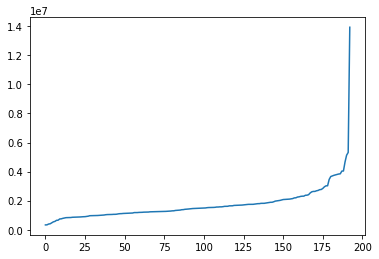

In [785]:
plt.plot(sorted(smallest))
plt.show()

## one hot encode tags

In [624]:
def to_onehot(tags):
    sum_tags = sum(tags,[])
    unique_tags = list(set(sum_tags))
    sum_tags
    # 2. LabelEncoder
    le = preprocessing.LabelEncoder()
    
    le.fit(sum_tags)
    print("Label fit all tags")
    sum_tags_2 = le.fit_transform(sum_tags)
    print("all tag Label",sum_tags_2.shape)
    # print(list(le.classes_))
    encode_tags=[]
    i=0
    for x in tags :
        x=(le.transform(x))
        encode_tags.append(x)
        i=i+1
        if i%100==0:
            print("encode num ",i," done")
    # 2. onehot
    enc = preprocessing.OneHotEncoder()
    print("onehot fit all tags")
    enc.fit(sum_tags_2.reshape(-1,1))
    onehotlabels = enc.transform(sum_tags_2.reshape(-1,1)).toarray()
    print("all tag one hot",onehotlabels.shape)
    one_hot_tags=[]
    i=0
    for x in encode_tags:
        onehotlabels = enc.transform(x.reshape(-1,1)).toarray()
        one_hot_tags.append(onehotlabels)
        i=i+1
        if i%100==0:
            print("encode num ",i," done\nresults:",onehotlabels)
    return(one_hot_tags)

In [625]:
def sumtags(one_hot_tags):
    one_hot_sum_tags=[]
    for aTadTalk in one_hot_tags:
        x=0
        for tag in aTadTalk:
            x=x+tag
#         print(x.sum())
        one_hot_sum_tags.append(x)
    return (one_hot_sum_tags)

In [646]:
popular_tags

[['children', 'creativity', 'culture', 'others', 'educat', 'others', 'others'],
 ['others',
  'others',
  'climatechange',
  'culture',
  'nonviolence',
  'globalis',
  'rocketscience',
  'others',
  'geology'],
 ['perso',
  'Internet',
  'others',
  'others',
  'mic',
  'finance',
  'others',
  'others',
  'geology'],
 ['others',
  'atheism',
  'Blindness',
  'capitalism',
  'nonviolence',
  'others',
  'Genderequality',
  'poli',
  'collaboration'],
 ['Africa',
  'others',
  'others',
  'demo',
  'behavioraleconomics',
  'globalis',
  'globalis',
  'hearthealth',
  'others',
  'others',
  'others'],
 ['Blindness',
  'culture',
  'Internet',
  'others',
  'others',
  'others',
  'psychology'],
 ['others',
  'others',
  'atheism',
  'others',
  'culture',
  'hu',
  'finance',
  'others',
  'storyte'],
 ['architecture', 'collaboration', 'culture', 'depression', 'others'],
 ['others',
  'others',
  'atheism',
  'Iran',
  'others',
  'others',
  'others',
  'others',
  'others'],
 ['other

In [647]:
one_hot_tags=to_onehot(popular_tags)

Label fit all tags
all tag Label (16670,)
encode num  100  done
encode num  200  done
encode num  300  done
encode num  400  done
encode num  500  done
encode num  600  done
encode num  700  done
encode num  800  done
encode num  900  done
encode num  1000  done
encode num  1100  done
encode num  1200  done
encode num  1300  done
encode num  1400  done
encode num  1500  done
encode num  1600  done
encode num  1700  done
encode num  1800  done
encode num  1900  done
encode num  2000  done
encode num  2100  done
encode num  2200  done
encode num  2300  done
encode num  2400  done
onehot fit all tags
all tag one hot (16670, 51)
encode num  100  done
results: [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

encode num  1100  done
results: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
encode num  1200  done
results: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.

encode num  2200  done
results: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [786]:
one_hot_sum_tags=sumtags(one_hot_tags)
one_hot_sum_tags=pd.DataFrame(np.array(one_hot_sum_tags))
one_hot_sum_tags

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## normalize

In [670]:
scale_duration=pd.Series(preprocessing.scale(np.array(EDA_data.duration)))
scale_languages=pd.Series(preprocessing.scale(np.array(EDA_data.languages)))
scale_trans=pd.Series(preprocessing.scale(np.array(EDA_data.sentiment)))


/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


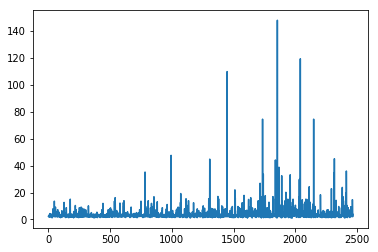

In [797]:
nonlinear_title_sentiment = pd.Series(nonlinear_title_sentiment,name='title_sent')
title_sentiment = pd.concat([EDA_data.title,nonlinear_title_sentiment],axis=1)
plt.plot(nonlinear_title_sentiment)
plt.show()

## get xs together

In [672]:
EDA_done=pd.concat([nonlinear_title_sentiment,nonlinear_description_sentiment, scale_trans,scale_duration,one_hot_event,one_hot_sum_tags], axis=1)
EDA_done.shape

(2467, 66)

## preprocess ys

In [673]:
EDA_data['q']=0
EDA_data.loc[EDA_data.views>EDA_data.views.quantile(0.25),'q']=1
EDA_data.loc[EDA_data.views>EDA_data.views.quantile(0.5),'q']=2
EDA_data.loc[EDA_data.views>EDA_data.views.quantile(0.75),'q']=3
EDA_data.head()
one_hot_q=pd.get_dummies(EDA_data['q'])

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [674]:
scale_views=pd.Series(preprocessing.scale(np.array(EDA_data['views'])))

/Users/amandachen/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## combine xs、ys

In [675]:
EDA_done_withY=pd.concat([EDA_done,one_hot_q],axis=1)


In [676]:
def get_train_test(csv):
    msk = np.random.rand(len(csv))<0.8
    train = csv[msk]
    test = csv[~msk]
    return(train,test)
def get_x_y(train,xs_count,ys_count):
    x_train = np.array(train.iloc[0:, 0:xs_count])
    y_train = np.array(train.iloc[0:,xs_count:xs_count+ys_count]).reshape(len(train),ys_count)
    return(x_train,y_train)

In [677]:
XS_COUNT=66
YS_COUNT=4
train,test=get_train_test(EDA_done_withY)
# train.loc[:,]
x_train,y_train=get_x_y(train,XS_COUNT,YS_COUNT)
x_test,y_test=get_x_y(test,XS_COUNT,YS_COUNT)
y_train
x_train

array([[  2.37037263e+00,   2.45030464e+00,   4.02343984e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.23374608e+00,   7.15629055e+01,   6.04462371e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.11074123e+00,   4.02516788e+00,   2.26112332e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  3.53688230e+00,   1.17844969e+04,   2.52881271e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.47037263e+01,   1.77472085e+03,   5.66879230e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.81781976e+00,   3.77234740e+02,  -9.95478278e-01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [811]:
model = Sequential()
model.add(Dropout(0.1, input_shape=(XS_COUNT,)))
# model.add(Dense(units=100,
#                input_dim=13,
#                kernel_initializer='uniform',
#                activation='relu'))
model.add(Dense(units=60,
                input_dim=XS_COUNT,
               kernel_initializer='uniform',
               activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=30,
                input_dim=XS_COUNT,
               kernel_initializer='uniform',
               activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=YS_COUNT,
               kernel_initializer='uniform',
                kernel_regularizer=regularizers.l2(0.03),
                activity_regularizer=regularizers.l1(0.03),
               activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [812]:
train_history = model.fit(x=x_train, 
                          y=y_train,
                          validation_split=0.05,
                          epochs=500, 
                          batch_size=30,
                          verbose=1)

Train on 1881 samples, validate on 100 samples
Epoch 1/500
1881/1881 [==============================] - 1s 560us/step - loss: 2.2821 - acc: 0.2770 - val_loss: 2.2725 - val_acc: 0.2200
Epoch 2/500
1881/1881 [==============================] - 0s 49us/step - loss: 2.2733 - acc: 0.2903 - val_loss: 2.2574 - val_acc: 0.3000
Epoch 3/500
1881/1881 [==============================] - 0s 47us/step - loss: 2.2638 - acc: 0.3323 - val_loss: 2.2930 - val_acc: 0.3000
Epoch 4/500
1881/1881 [==============================] - 0s 46us/step - loss: 2.2562 - acc: 0.3307 - val_loss: 2.2871 - val_acc: 0.2200
Epoch 5/500
1881/1881 [==============================] - 0s 46us/step - loss: 2.2403 - acc: 0.3589 - val_loss: 2.2384 - val_acc: 0.2800
Epoch 6/500
1881/1881 [==============================] - 0s 46us/step - loss: 2.2266 - acc: 0.3647 - val_loss: 2.3188 - val_acc: 0.1700
Epoch 7/500
1881/1881 [==============================] - 0s 47us/step - loss: 2.2311 - acc: 0.3424 - val_loss: 2.2532 - val_acc: 0.3100


1881/1881 [==============================] - 0s 47us/step - loss: 2.1575 - acc: 0.4083 - val_loss: 2.2847 - val_acc: 0.2600
Epoch 61/500
1881/1881 [==============================] - 0s 52us/step - loss: 2.1515 - acc: 0.4280 - val_loss: 2.3175 - val_acc: 0.2200
Epoch 62/500
1881/1881 [==============================] - 0s 48us/step - loss: 2.1534 - acc: 0.4125 - val_loss: 2.2768 - val_acc: 0.3000
Epoch 63/500
1881/1881 [==============================] - 0s 46us/step - loss: 2.1593 - acc: 0.4168 - val_loss: 2.2499 - val_acc: 0.2900
Epoch 64/500
1881/1881 [==============================] - 0s 58us/step - loss: 2.1373 - acc: 0.4163 - val_loss: 2.2654 - val_acc: 0.2500
Epoch 65/500
1881/1881 [==============================] - 0s 62us/step - loss: 2.1414 - acc: 0.4232 - val_loss: 2.2734 - val_acc: 0.3200
Epoch 66/500
1881/1881 [==============================] - 0s 56us/step - loss: 2.1525 - acc: 0.4173 - val_loss: 2.1408 - val_acc: 0.3600
Epoch 67/500
1881/1881 [==============================

Epoch 120/500
1881/1881 [==============================] - 0s 55us/step - loss: 2.1118 - acc: 0.4317 - val_loss: 2.2437 - val_acc: 0.2700
Epoch 121/500
1881/1881 [==============================] - 0s 56us/step - loss: 2.0926 - acc: 0.4593 - val_loss: 2.2856 - val_acc: 0.2200
Epoch 122/500
1881/1881 [==============================] - 0s 57us/step - loss: 2.0929 - acc: 0.4514 - val_loss: 2.3302 - val_acc: 0.2200
Epoch 123/500
1881/1881 [==============================] - 0s 55us/step - loss: 2.0835 - acc: 0.4689 - val_loss: 2.3402 - val_acc: 0.2200
Epoch 124/500
1881/1881 [==============================] - 0s 57us/step - loss: 2.1250 - acc: 0.4471 - val_loss: 2.3954 - val_acc: 0.2500
Epoch 125/500
1881/1881 [==============================] - 0s 56us/step - loss: 2.1054 - acc: 0.4423 - val_loss: 2.2838 - val_acc: 0.2300
Epoch 126/500
1881/1881 [==============================] - 0s 51us/step - loss: 2.1169 - acc: 0.4455 - val_loss: 2.2388 - val_acc: 0.3000
Epoch 127/500
1881/1881 [=========

1881/1881 [==============================] - 0s 56us/step - loss: 2.0316 - acc: 0.5098 - val_loss: 2.3533 - val_acc: 0.2900
Epoch 180/500
1881/1881 [==============================] - 0s 55us/step - loss: 2.0469 - acc: 0.4934 - val_loss: 2.2765 - val_acc: 0.2800
Epoch 181/500
1881/1881 [==============================] - 0s 53us/step - loss: 2.0432 - acc: 0.4891 - val_loss: 2.3182 - val_acc: 0.2900
Epoch 182/500
1881/1881 [==============================] - 0s 63us/step - loss: 2.0728 - acc: 0.4907 - val_loss: 2.3417 - val_acc: 0.3300
Epoch 183/500
1881/1881 [==============================] - 0s 63us/step - loss: 2.0578 - acc: 0.4779 - val_loss: 2.2597 - val_acc: 0.3100
Epoch 184/500
1881/1881 [==============================] - 0s 60us/step - loss: 2.0640 - acc: 0.4795 - val_loss: 2.2719 - val_acc: 0.2900
Epoch 185/500
1881/1881 [==============================] - 0s 54us/step - loss: 2.0539 - acc: 0.4928 - val_loss: 2.4777 - val_acc: 0.1800
Epoch 186/500
1881/1881 [=======================

1881/1881 [==============================] - 0s 53us/step - loss: 2.0061 - acc: 0.5237 - val_loss: 2.3939 - val_acc: 0.2900
Epoch 239/500
1881/1881 [==============================] - 0s 49us/step - loss: 2.0132 - acc: 0.5125 - val_loss: 2.3965 - val_acc: 0.2600
Epoch 240/500
1881/1881 [==============================] - 0s 46us/step - loss: 2.0005 - acc: 0.5359 - val_loss: 2.3900 - val_acc: 0.2600
Epoch 241/500
1881/1881 [==============================] - 0s 46us/step - loss: 1.9876 - acc: 0.5237 - val_loss: 2.4025 - val_acc: 0.2800
Epoch 242/500
1881/1881 [==============================] - 0s 45us/step - loss: 1.9969 - acc: 0.5253 - val_loss: 2.4025 - val_acc: 0.2700
Epoch 243/500
1881/1881 [==============================] - 0s 47us/step - loss: 2.0126 - acc: 0.5125 - val_loss: 2.4090 - val_acc: 0.2500
Epoch 244/500
1881/1881 [==============================] - 0s 60us/step - loss: 2.0093 - acc: 0.5167 - val_loss: 2.4264 - val_acc: 0.2500
Epoch 245/500
1881/1881 [=======================

1881/1881 [==============================] - 0s 48us/step - loss: 1.9837 - acc: 0.5354 - val_loss: 2.4706 - val_acc: 0.2900
Epoch 298/500
1881/1881 [==============================] - 0s 45us/step - loss: 1.9718 - acc: 0.5354 - val_loss: 2.3422 - val_acc: 0.3200
Epoch 299/500
1881/1881 [==============================] - 0s 50us/step - loss: 1.9717 - acc: 0.5497 - val_loss: 2.4492 - val_acc: 0.2200
Epoch 300/500
1881/1881 [==============================] - 0s 66us/step - loss: 1.9659 - acc: 0.5470 - val_loss: 2.3749 - val_acc: 0.3200
Epoch 301/500
1881/1881 [==============================] - 0s 51us/step - loss: 1.9554 - acc: 0.5593 - val_loss: 2.3919 - val_acc: 0.2400
Epoch 302/500
1881/1881 [==============================] - 0s 48us/step - loss: 1.9713 - acc: 0.5502 - val_loss: 2.4166 - val_acc: 0.2800
Epoch 303/500
1881/1881 [==============================] - 0s 49us/step - loss: 1.9724 - acc: 0.5332 - val_loss: 2.4892 - val_acc: 0.2000
Epoch 304/500
1881/1881 [=======================

1881/1881 [==============================] - 0s 46us/step - loss: 1.9695 - acc: 0.5470 - val_loss: 2.4454 - val_acc: 0.1800
Epoch 357/500
1881/1881 [==============================] - 0s 45us/step - loss: 1.9579 - acc: 0.5550 - val_loss: 2.4030 - val_acc: 0.2800
Epoch 358/500
1881/1881 [==============================] - 0s 50us/step - loss: 1.9716 - acc: 0.5417 - val_loss: 2.3919 - val_acc: 0.2200
Epoch 359/500
1881/1881 [==============================] - 0s 53us/step - loss: 1.9347 - acc: 0.5497 - val_loss: 2.4602 - val_acc: 0.2100
Epoch 360/500
1881/1881 [==============================] - 0s 49us/step - loss: 1.9610 - acc: 0.5332 - val_loss: 2.3633 - val_acc: 0.2400
Epoch 361/500
1881/1881 [==============================] - 0s 47us/step - loss: 1.9513 - acc: 0.5673 - val_loss: 2.4430 - val_acc: 0.2600
Epoch 362/500
1881/1881 [==============================] - 0s 49us/step - loss: 1.9583 - acc: 0.5540 - val_loss: 2.4531 - val_acc: 0.2300
Epoch 363/500
1881/1881 [=======================

1881/1881 [==============================] - 0s 56us/step - loss: 1.9571 - acc: 0.5492 - val_loss: 2.3992 - val_acc: 0.2800
Epoch 416/500
1881/1881 [==============================] - 0s 67us/step - loss: 1.9419 - acc: 0.5667 - val_loss: 2.3969 - val_acc: 0.2700
Epoch 417/500
1881/1881 [==============================] - 0s 62us/step - loss: 1.9519 - acc: 0.5476 - val_loss: 2.5232 - val_acc: 0.2400
Epoch 418/500
1881/1881 [==============================] - 0s 49us/step - loss: 1.9267 - acc: 0.5625 - val_loss: 2.4494 - val_acc: 0.2300
Epoch 419/500
1881/1881 [==============================] - 0s 49us/step - loss: 1.9359 - acc: 0.5561 - val_loss: 2.4043 - val_acc: 0.2800
Epoch 420/500
1881/1881 [==============================] - 0s 45us/step - loss: 1.9138 - acc: 0.5805 - val_loss: 2.4875 - val_acc: 0.2300
Epoch 421/500
1881/1881 [==============================] - 0s 52us/step - loss: 1.9189 - acc: 0.5715 - val_loss: 2.3608 - val_acc: 0.2600
Epoch 422/500
1881/1881 [=======================

1881/1881 [==============================] - 0s 50us/step - loss: 1.9264 - acc: 0.5673 - val_loss: 2.3662 - val_acc: 0.2700
Epoch 475/500
1881/1881 [==============================] - 0s 51us/step - loss: 1.9204 - acc: 0.5736 - val_loss: 2.3931 - val_acc: 0.2700
Epoch 476/500
1881/1881 [==============================] - 0s 59us/step - loss: 1.9199 - acc: 0.5715 - val_loss: 2.3753 - val_acc: 0.2900
Epoch 477/500
1881/1881 [==============================] - 0s 45us/step - loss: 1.9400 - acc: 0.5566 - val_loss: 2.6088 - val_acc: 0.2200
Epoch 478/500
1881/1881 [==============================] - 0s 43us/step - loss: 1.9928 - acc: 0.5375 - val_loss: 2.3204 - val_acc: 0.2300
Epoch 479/500
1881/1881 [==============================] - 0s 43us/step - loss: 1.9754 - acc: 0.5513 - val_loss: 2.3635 - val_acc: 0.1900
Epoch 480/500
1881/1881 [==============================] - 0s 50us/step - loss: 1.9942 - acc: 0.5316 - val_loss: 2.4190 - val_acc: 0.2300
Epoch 481/500
1881/1881 [=======================

In [813]:
scores = model.evaluate(x_test,y_test)
scores

486/486 [==============================] - 0s 33us/step


[2.4495252311965565, 0.3539094650818978]

In [814]:
ans = model.predict(x_test)
ans

array([[ 0.09583148,  0.71739829,  0.17537503,  0.01139515],
       [ 0.09307998,  0.05821186,  0.21274394,  0.63596427],
       [ 0.71542144,  0.08078141,  0.11915511,  0.0846421 ],
       ..., 
       [ 0.11872365,  0.30447963,  0.2934531 ,  0.28334364],
       [ 0.11872365,  0.30447963,  0.2934531 ,  0.28334364],
       [ 0.32894108,  0.37412715,  0.20647715,  0.09045459]], dtype=float32)

In [815]:
def get_ans(x):
    x = list(x)
    return x.index(max(x))

In [816]:
predict = pd.Series(map(get_ans,ans))
origin_ans = pd.Series(map(get_ans,y_test))
compare_ans = pd.concat((predict,origin_ans),axis=1)
compare_ans

,0,1
0,1,2
1,3,3
2,0,3
3,3,2
4,0,1
5,1,3
6,0,0
7,3,3
8,3,3
9,0,0


In [817]:
print("絕對誤差值",sum(abs(compare_ans[0]-compare_ans[1]))/len(compare_ans[0]))
print("誤差值",sum(compare_ans[0]-compare_ans[1])/len(compare_ans[0]))
print("正確率",sum(compare_ans[0]==compare_ans[1])/len(compare_ans[0]))

絕對誤差值 1.0
誤差值 -0.205761316872428
正確率 0.35390946502057613


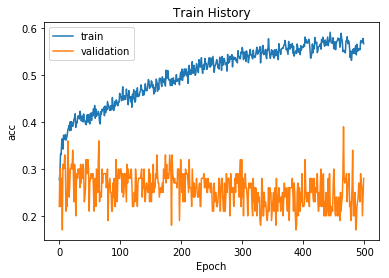

In [818]:
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
train = 'acc'
validation = 'val_acc'
plt.plot(train_history.history[train])
plt.plot(train_history.history[validation])
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel(train)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

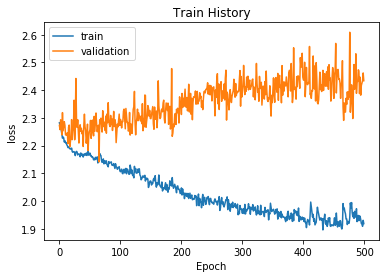

In [819]:
train = 'loss'
validation = 'val_loss'
plt.plot(train_history.history[train])
plt.plot(train_history.history[validation])
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel(train)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Analyze transcript

In [797]:
!jupyter nbconvert --to script Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to script
[NbConvertApp] Writing 7654 bytes to Untitled.py
